**SOAL NO.1 FILE WAV**

In [27]:
import os

# tentukan nama file
nama_file = "/kaggle/input/wav-file/note_08_20221305.wav"

# gunakan os.path.getsize untuk mendapatkan ukuran file dalam bytes
ukuran_file = os.path.getsize(nama_file)

print(f"Ukuran file dari {nama_file} adalah {ukuran_file} bytes.")


Ukuran file dari /kaggle/input/wav-file/note_08_20221305.wav adalah 352844 bytes.


In [28]:
import wave
import contextlib

# tentukan nama file WAV
nama_file = "/kaggle/input/wav-file/note_08_20221305.wav"

# buka file WAV menggunakan modul wave
with wave.open(nama_file, "r") as wave_file:
    # dapatkan framerate (jumlah frame per detik) dari file WAV
    frame_rate = wave_file.getframerate()

# dapatkan durasi file WAV menggunakan modul contextlib
with contextlib.closing(wave.open(nama_file, "r")) as wave_file:
    frames = wave_file.getnframes()
    durasi = frames / float(frame_rate)

print(f"Durasi dari file {nama_file} adalah {durasi} detik.")


Durasi dari file /kaggle/input/wav-file/note_08_20221305.wav adalah 4.0 detik.


In [29]:
import wave

# tentukan nama file WAV
nama_file = "/kaggle/input/wav-file/note_08_20221305.wav"

# buka file WAV menggunakan modul wave
with wave.open(nama_file, "r") as wave_file:
    # dapatkan sample rate dari file WAV
    sample_rate = wave_file.getframerate()

print(f"Sample rate dari file {nama_file} adalah {sample_rate} Hz.")


Sample rate dari file /kaggle/input/wav-file/note_08_20221305.wav adalah 44100 Hz.


Sample rate dari file /kaggle/input/wav-file/note_08_20221305.wav adalah 44100 Hz.
Jumlah sample adalah 176400.
Frekuensi maksimum yang dapat ditampilkan adalah 22050.0 Hz.
Frekuensi yang terdeteksi adalah 88201.
Frekuensi pertama adalah 0.0 Hz.
Frekuensi terakhir adalah 22050.0 Hz.


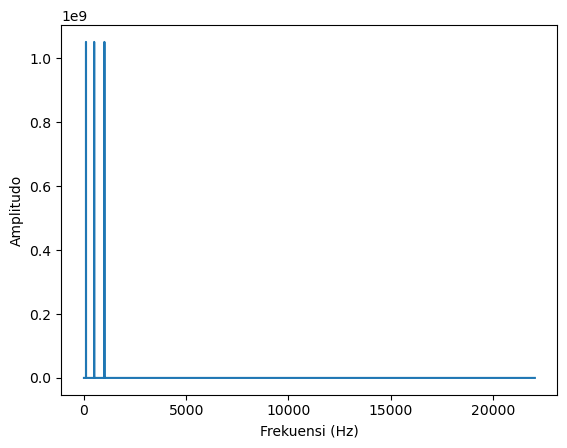

In [30]:
import numpy as np
from scipy.fft import rfft
import wave
import matplotlib.pyplot as plt


# tentukan nama file WAV
nama_file = "/kaggle/input/wav-file/note_08_20221305.wav"

# buka file WAV menggunakan modul wave
with wave.open(nama_file, "r") as wave_file:
    # baca data dari file WAV dan ubah ke dalam format array numpy
    data = np.frombuffer(wave_file.readframes(-1), dtype='int16')
    # dapatkan sample rate dari file WAV
    sample_rate = wave_file.getframerate()

# hitung FFT menggunakan rfft dari modul scipy.fft
fft = rfft(data)

# hitung jumlah sample
jumlah_sample = len(data)

# hitung frekuensi
frekuensi = np.fft.rfftfreq(jumlah_sample, d=1/sample_rate)

# menghitung nilai amplitudo dari FFT
amplitude = np.abs(fft)

# tampilkan hasil
print(f"Sample rate dari file {nama_file} adalah {sample_rate} Hz.")
print(f"Jumlah sample adalah {jumlah_sample}.")
print(f"Frekuensi maksimum yang dapat ditampilkan adalah {sample_rate/2} Hz.")
print(f"Frekuensi yang terdeteksi adalah {len(frekuensi)}.")
print(f"Frekuensi pertama adalah {frekuensi[0]} Hz.")
print(f"Frekuensi terakhir adalah {frekuensi[-1]} Hz.")


# membuat plot amplitudo vs frekuensi
plt.plot(frekuensi, amplitude)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.show()

In [31]:
import soundfile as sf
import numpy as np

audio, samplerate = sf.read('/kaggle/input/wav-file/note_08_20221305.wav')

from scipy.fft import rfft

X = rfft(audio)
N = len(audio)
freqs = np.fft.fftfreq(N, d=1/samplerate)[:N//2+1]
peak_indices = np.argsort(np.abs(X))[-3:]

# 3 frekuensi puncak terbesar
peak_freqs = freqs[peak_indices]
print("Tiga frekuensi puncak terbesar adalah:")
for freq in peak_freqs:
    print("{:.2f} Hz".format(freq))

Tiga frekuensi puncak terbesar adalah:
100.00 Hz
500.00 Hz
1000.00 Hz


**SOAL NO.2 FILE PNG**

In [32]:
import os

# tentukan nama file
nama_file = "/kaggle/input/wav-file/20221305.png"

# gunakan os.path.getsize untuk mendapatkan ukuran file dalam bytes
ukuran_file = os.path.getsize(nama_file)

print(f"Ukuran file dari {nama_file} adalah {ukuran_file} bytes.")

Ukuran file dari /kaggle/input/wav-file/20221305.png adalah 1804 bytes.


In [33]:
from PIL import Image

# Buka file gambar PNG
im = Image.open("/kaggle/input/wav-file/20221305.png")

# Dapatkan ukuran citra
width, height = im.size

print("Ukuran citra: {} x {}".format(width, height))


Ukuran citra: 100 x 100


In [34]:
from PIL import Image

# Buka file gambar PNG
im = Image.open("/kaggle/input/wav-file/20221305.png")

# Dapatkan format pixel citra
pixel_format = im.mode

print("Format pixel citra: {}".format(pixel_format))


Format pixel citra: RGBA


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


Text(0.5, 1.0, 'Spektrum frekuensi')

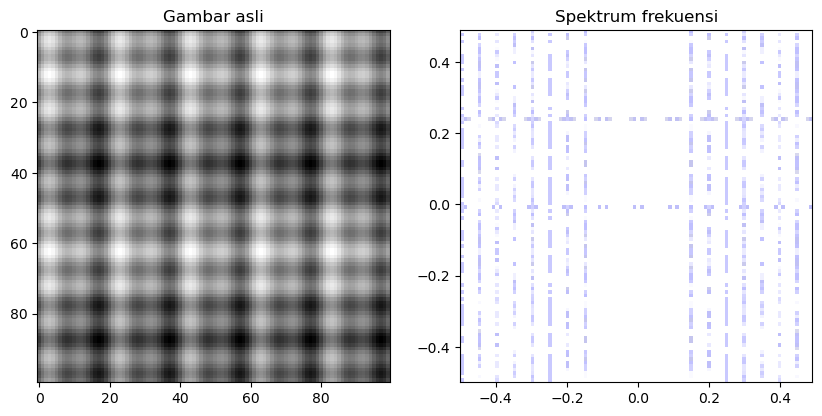

In [35]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Buka file gambar PNG
im = Image.open("/kaggle/input/wav-file/20221305.png")

# Konversi gambar menjadi array numpy
arr = np.array(im)

# Lakukan FFT 2-D
arr_fft = np.fft.fft2(np.fft.ifftshift(arr))

# Dapatkan ukuran gambar dan frekuensi sampel
width, height = im.size
freq_x = np.fft.fftfreq(width)
freq_y = np.fft.fftfreq(height)

# Plot gambar dan spektrum frekuensi
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(arr, cmap='gray')
axs[0].set_title('Gambar asli')

axs[1].imshow(np.log10(np.abs(np.fft.fftshift(arr_fft))), cmap='gray', extent=[freq_x.min(), freq_x.max(), freq_y.min(), freq_y.max()])
axs[1].set_title('Spektrum frekuensi')